## ARIMA Model
Autoregressive (AR), Moving Average (MA), and Autoregressive Integrated Moving Average (ARIMA) models are fundamental time series forecasting methods. They are used to model and predict future points in a series based on its past values and past forecast errors. Here’s a detailed explanation of each:

**AR: “I predict today based on yesterday’s values.”**

**MA: “I predict today based on how wrong I was in the past forecasts.”**

| Component | Depends on                  | Correlation type                    | Example usage     |
| --------- | --------------------------- | ----------------------------------- | ----------------- |
| AR(p)     | Lagged **y values**         | Auto-correlation of series          | Trend persistence |
| MA(q)     | Lagged **errors/residuals** | Auto-correlation of forecast errors | Short-term shocks |


### Autoregressive (AR) Model

The AR model uses the dependency between an observation and a number of lagged observations (previous values). It's defined by the order \( p \), which represents the number of lagged observations included in the model.

#### Equation
The AR(p) model can be written as:
$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
$$
where:
- \( X_t \) is the value at time \( t \).
- \( c \) is a constant.
- $$ \phi_1, \phi_2, \ldots, \phi_p $$ are the coefficients of the model.
- $$ \epsilon_t $$ is white noise (a random error term).

### Moving Average (MA) Model

The MA model uses past forecast errors in a regression-like model. The order \( q \) of the model indicates the number of lagged forecast errors included.

#### Equation
The MA(q) model is given by:
$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$
where:
- \( X_t \) is the value at time \( t \).
- $$ \mu $$ is the mean of the series.
- $$\epsilon_t $$ is the white noise error term.
- $$ \theta_1, \theta_2, \ldots, \theta_q $$ are the coefficients of the model.

### Autoregressive Integrated Moving Average (ARIMA) Model

The ARIMA model combines AR and MA models and adds a differencing step to make the time series stationary, which is necessary for the model to be effective.

#### Components
1. **Autoregressive (AR) part**: \( p \) is the number of lagged observations.
2. **Integrated (I) part**: \( d \) is the number of times the raw observations are differenced to make the series stationary.
3. **Moving Average (MA) part**: \( q \) is the number of lagged forecast errors.

#### Equation
The general form of an ARIMA(p, d, q) model is:
$$
\Delta^d X_t = c + \phi_1 \Delta^d X_{t-1} + \cdots + \phi_p \Delta^d X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}
$$
where $$ \Delta^d $$ represents differencing the series \( d \) times.


# Selection of p,d,q values in ARIMA model
 **step-by-step guide** to select $p,d,q$ values for an ARIMA model:

---

# 🔹 ARIMA($p,d,q$) parameters

* $p$: order of the **autoregressive (AR)** part
* $d$: order of **differencing** (to make the series stationary)
* $q$: order of the **moving average (MA)** part

---


### **Step 1. Check stationarity (decide $d$)**

1. Plot the **time series** (look for trends, seasonality).
2. Run **Augmented Dickey–Fuller (ADF) test**:

   * $H_0:$ non-stationary
   * $H_1:$ stationary
   * If p-value > 0.05 → not stationary → apply differencing.
3. Start with $d=0$. If needed, difference once ($d=1$). Rarely $d=2$.

   * Example: If the series has a clear upward trend → usually $d=1$.

---

### **Step 2. Choose $p$ (AR order) using PACF**

* Plot the **Partial Autocorrelation Function (PACF)**.
* Rule of thumb:

  * Significant cut-off after lag $k$ in PACF → choose $p=k$.
  * If PACF tails off gradually → AR part may not be needed (set $p=0$).

---

### **Step 3. Choose $q$ (MA order) using ACF**

* Plot the **Autocorrelation Function (ACF)**.
* Rule of thumb:

  * Significant cut-off after lag $k$ in ACF → choose $q=k$.
  * If ACF tails off gradually → MA part may not be needed (set $q=0$).

---

### **Step 4. Fit candidate ARIMA models**

* Try different combinations of $(p,d,q)$ suggested by ACF/PACF plots.
* Example: If PACF cuts off at lag 1, ACF cuts off at lag 1 → try ARIMA(1,1,1).

---

### **Step 5. Model selection**

* Fit models and compare:

  * **AIC / BIC** (lower is better).
  * **Residual diagnostics**:

    * Residuals should look like white noise (no autocorrelation).
    * Use **Ljung–Box test** to check residual independence.

---

### **Step 6. Forecast validation**

* Split data into training/test sets.
* Check forecast accuracy (RMSE, MAE, MAPE).
* Choose the model with best performance.

---

# 🔹Summary:

1. Series not stationary → take first difference ($d=1$).
2. PACF cuts off at lag 2 → suggest $p=2$.
3. ACF cuts off at lag 1 → suggest $q=1$.
   👉 Candidate model: **ARIMA(2,1,1)**.

---

⚡ In practice:

* Use ACF/PACF for initial guess.
* Refine with AIC/BIC and residual checks.
* For automation → use tools like `pmdarima.auto_arima()` in Python or R’s `auto.arima()`.

---



In [5]:
# Import libraries

from matplotlib import pyplot
import warnings
import numpy
from sklearn.metrics import mean_squared_error
#import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [126]:
series = pd.read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [128]:
series


,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


###### The dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data. The values are in the units of liters per capita per day, and there are 79 observations. The dataset is credited to Hipel and McLeod, 1994.

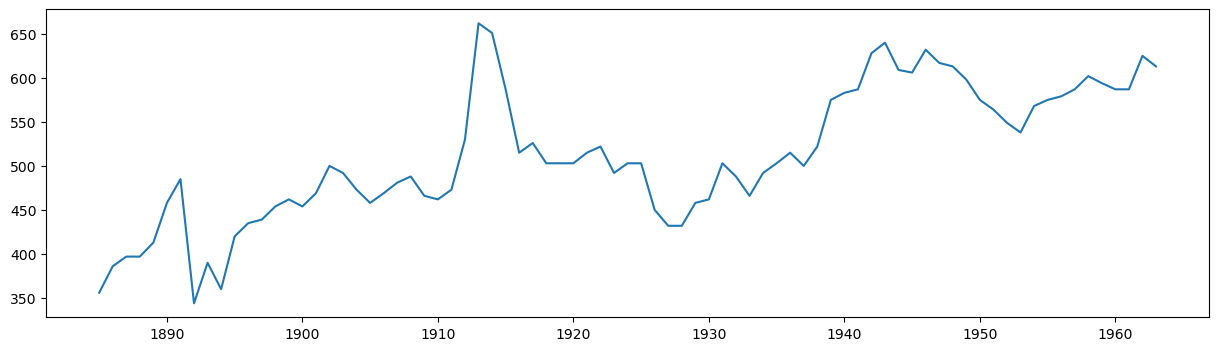

In [11]:
# line plot of time series
plt.figure(figsize=(15,4))
plt.plot(series)
pyplot.show()

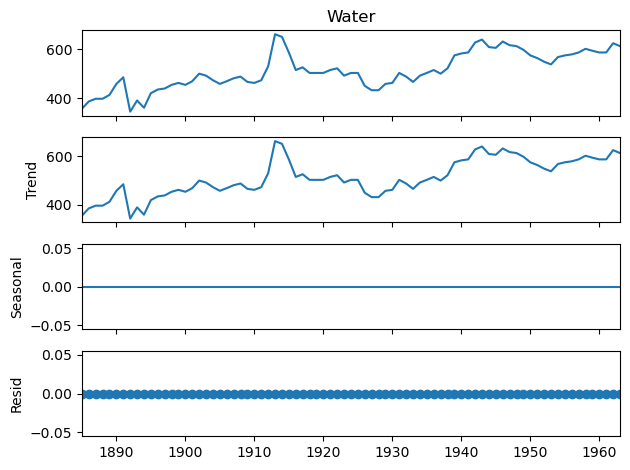

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(series.Water
                                     )
decompose_ts_add.plot()
plt.show()

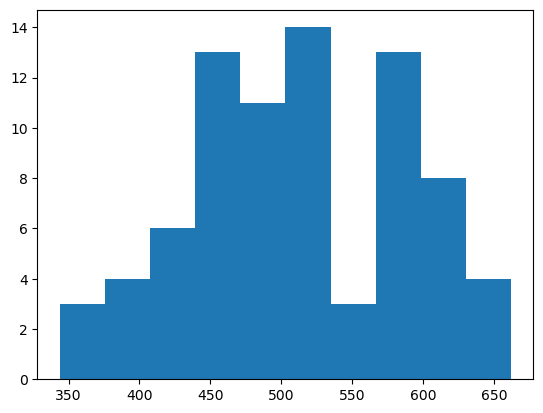

In [15]:
plt.hist(series.Water)
plt.show()

<Axes: ylabel='Density'>

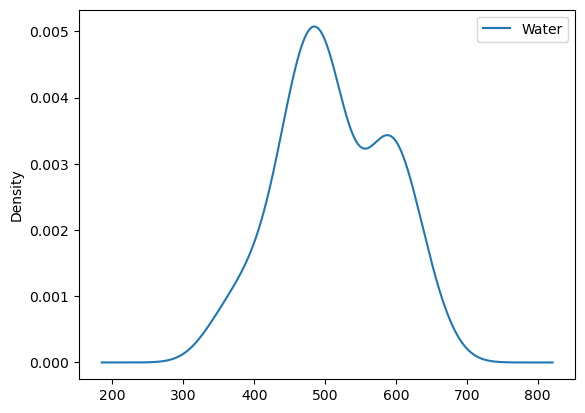

In [17]:
series.plot(kind='kde')

In [19]:
#Jarque Bera Stastical Test for Normality
# Ho:Null Hyothesis: The series is Normally distributed,
# Ha:The series is not normally distributed

from scipy.stats import jarque_bera as jb
is_norm=jb(series["Water"])[1]
print(is_norm)
print(f"p value:{is_norm.round(2)}", \
      ", Series is Normal" if is_norm >0.05 else ", Series is Non-Normal")

0.4376528924271732
p value:0.44 , Series is Normal


## Augmented Dickey-Fuller (ADF) test
#### h0 : The series is non-stationary
#### ha : The series is stationary

#### ARIMA Model

In [124]:
# Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# extracting values from data frame
values = series.values

# passing the extracted values to adfuller function.
res = adfuller(values)
print(res)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f'  %res[1])

if (res[1] > 0.025):
    print("The time series is non-stationary")
    

# printing the critical values at different alpha levels and the result of the test.
# print('critical values at different levels:')
# for k, v in res[4].items():
#     print (k, v)


(-2.077087450405188, 0.2538270887941583, 2, 76, {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}, 622.4874229514137)
Augmneted Dickey_fuller Statistic: -2.077087
p-value: 0.253827
The time series is non-stationary


            Water
Year             
1885-01-01    NaN
1886-01-01   30.0
1887-01-01   11.0
1888-01-01    0.0
1889-01-01   16.0
...           ...
1959-01-01   -8.0
1960-01-01   -7.0
1961-01-01    0.0
1962-01-01   38.0
1963-01-01  -12.0

[79 rows x 1 columns]
4.059380122723465e-09
p value:4.059380122723465e-09 , Series is Stationary


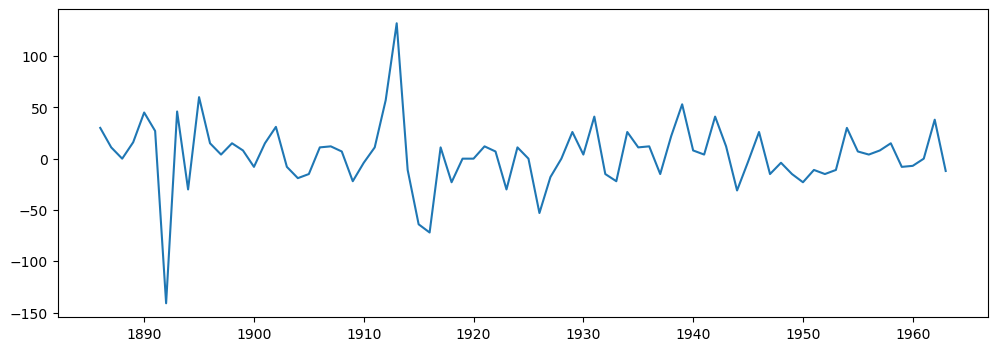

In [29]:
#De-trending with first order differencing
data1 = pd.DataFrame(series["Water"].diff())
print(data1)
de_trended = data1.dropna()
adf2 = adfuller(de_trended.values)[1]
print(adf2)
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

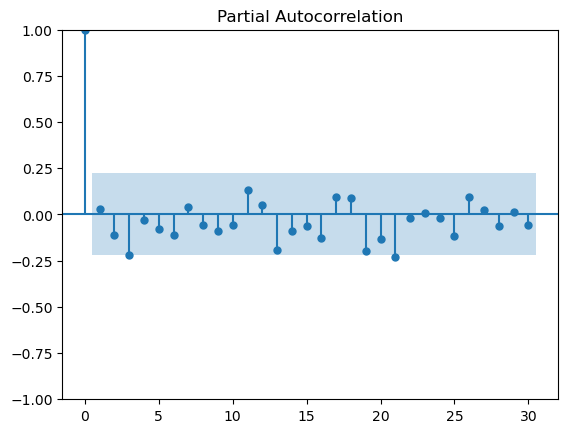

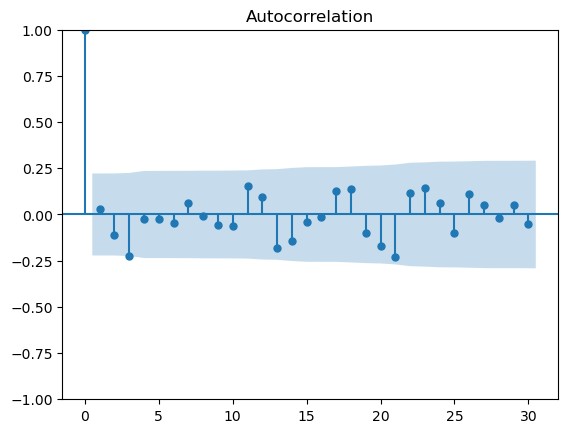

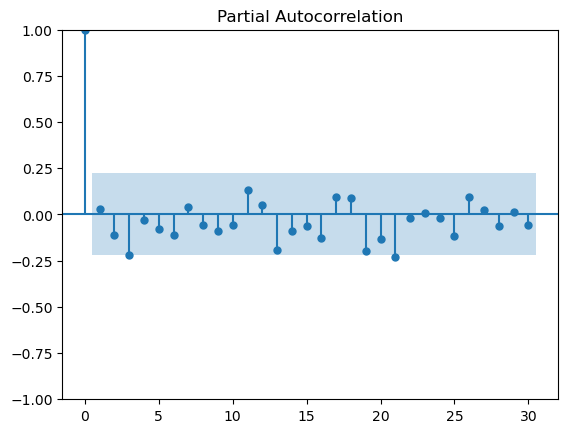

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(de_trended.values,lags=30)
tsa_plots.plot_pacf(de_trended.values,lags=30)

In [16]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


#### Build the model for chosen for p,d,q values of p=3, d=1, q=3

In [37]:
# separate out a validation dataset
split_point = len(series) - 10
train, validation = series[0:split_point], series[split_point:]
#print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
# dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

In [41]:
train

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1949-01-01,598
1950-01-01,575
1951-01-01,564


In [43]:
train1 = train.reset_index(drop=False)

In [20]:
train1

,Year,Water
0,1885-01-01,356
1,1886-01-01,386
2,1887-01-01,397
3,1888-01-01,397
4,1889-01-01,413
...,...,...
64,1949-01-01,598
65,1950-01-01,575
66,1951-01-01,564
67,1952-01-01,549


In [45]:
# load data
#train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [22]:
validation

,Water
Year,
1954-01-01,568
1955-01-01,575
1956-01-01,579
1957-01-01,587
1958-01-01,602
1959-01-01,594
1960-01-01,587
1961-01-01,587
1962-01-01,625


In [91]:
# fit model
model = ARIMA(X, order=(4,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
forecast

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([604.8450695 , 589.65098396, 599.37350666, 605.74584533,
       593.3851333 , 592.65237079, 603.21261393, 599.20748072,
       592.02001195, 598.64457769])

In [93]:
test = pd.read_csv("validation.csv")
test

,Year,Water
0,1954-01-01,568
1,1955-01-01,575
2,1956-01-01,579
3,1957-01-01,587
4,1958-01-01,602
5,1959-01-01,594
6,1960-01-01,587
7,1961-01-01,587
8,1962-01-01,625
9,1963-01-01,613


In [95]:
test["forecast"]=forecast

In [97]:
test

,Year,Water,forecast
0,1954-01-01,568,604.845069
1,1955-01-01,575,589.650984
2,1956-01-01,579,599.373507
3,1957-01-01,587,605.745845
4,1958-01-01,602,593.385133
5,1959-01-01,594,592.652371
6,1960-01-01,587,603.212614
7,1961-01-01,587,599.207481
8,1962-01-01,625,592.020012
9,1963-01-01,613,598.644578


In [99]:
#Error on the test data
val=pd.read_csv('validation.csv')
rmse = np.sqrt(mean_squared_error(val.Water, forecast))
rmse

20.298665469455752

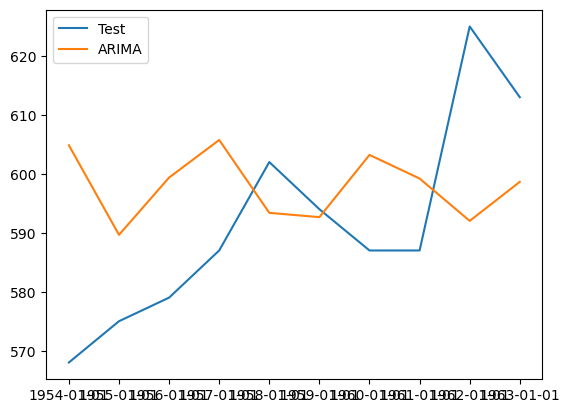

In [101]:
# plt.figure(figsize=(16,8))
#plt.plot(train1["Year"],train1["Water"], label='Train')
plt.plot(test["Year"],test["Water"], label='Test')
plt.plot(test["Year"],test["forecast"], label="ARIMA")
plt.legend(loc='best')
plt.show()

#### Combine train and test data and build final model

In [103]:
# fit model
data = pd.read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = series.values
print(X[0:5])
print(X.dtype)

[[356]
 [386]
 [397]
 [397]
 [413]]
int64


In [105]:
X = X.astype('float32')

In [107]:
model = ARIMA(X, order=(4,1,4))
model_fit = model.fit()

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
forecast=model_fit.forecast(steps=5)
forecast

array([604.8450695 , 589.65098396, 599.37350666, 605.74584533,
       593.3851333 ])

In [111]:
forecastdata = pd.DataFrame()
forecastdata["forecasted_val"] = forecast

In [115]:
forecastdata

,forecasted_val
0,604.845069
1,589.650984
2,599.373507
3,605.745845
4,593.385133


In [117]:
series.head()

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413


In [119]:
waterusage = pd.concat([series,forecastdata], ignore_index=True)

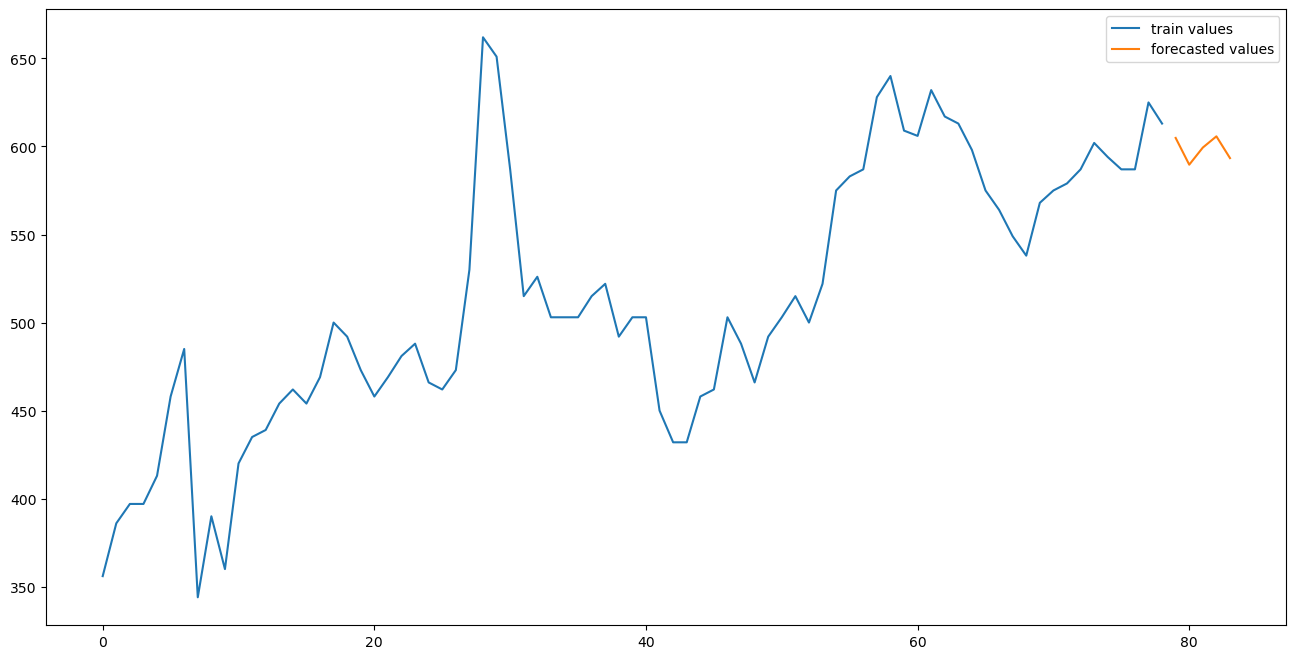

In [121]:
plt.figure(figsize=(16,8))

plt.plot(waterusage["Water"], label='train values')
plt.plot(waterusage["forecasted_val"], label="forecasted values")
plt.legend(loc='best')
plt.show()